In [1]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import os
import glob
from scipy.signal import butter,filtfilt
import scipy

#Setup to show all columns (useful for Questionnaire)
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 1000

sns.set_theme(style="whitegrid")

D:\miniconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Get single participant's conation data

In [2]:
p1 = pd.read_table('Data/Participant1/conation.txt',header=None).T
p2 = pd.read_table('Data/Participant2/conation.txt',header=None).T
p3 = pd.read_table('Data/Participant3/conation.txt',header=None).T
p4 = pd.read_table('Data/Participant4/conation.txt',header=None).T
p5 = pd.read_table('Data/Participant2/conation.txt',header=None).T
p6 = pd.read_table('Data/Participant6/conation.txt',header=None).T
p7 = pd.read_table('Data/Participant7/conation.txt',header=None).T
p8 = pd.read_table('Data/Participant8/conation.txt',header=None).T
p9 = pd.read_table('Data/Participant9/conation.txt',header=None).T
p10 = pd.read_table('Data/Participant10/conation.txt',header=None).T
p11 = pd.read_table('Data/Participant11/conation.txt',header=None).T
p12 = pd.read_table('Data/Participant12/conation.txt',header=None).T
p13 = pd.read_table('Data/Participant13/conation.txt',header=None).T

p1


,0,1,2
0,7,7,6


# Extract conation data, taken from all participants

In [3]:
filepath = 'Data/'
fileConation = 'conation.txt'

#find folder of each participant
participants = os.listdir('Data/') 
print(participants)

#find the conation file inside the participant folder
conationFiles = []

for p in participants:
    conationFiles.append(filepath+p+'/'+fileConation)
print(conationFiles)

#combine different participant's conation data
data = []

for f in conationFiles:
    df = pd.read_table(f, header=None)
    data.append(df.T)

conation = pd.concat((data), ignore_index=True)

conation["Avg_per_person"] = conation.mean(axis = 1)

conation

['Participant1', 'Participant10', 'Participant11', 'Participant12', 'Participant13', 'Participant2', 'Participant3', 'Participant4', 'Participant5', 'Participant6', 'Participant7', 'Participant8', 'Participant9']
['Data/Participant1/conation.txt', 'Data/Participant10/conation.txt', 'Data/Participant11/conation.txt', 'Data/Participant12/conation.txt', 'Data/Participant13/conation.txt', 'Data/Participant2/conation.txt', 'Data/Participant3/conation.txt', 'Data/Participant4/conation.txt', 'Data/Participant5/conation.txt', 'Data/Participant6/conation.txt', 'Data/Participant7/conation.txt', 'Data/Participant8/conation.txt', 'Data/Participant9/conation.txt']


,0,1,2,Avg_per_person
0,7,7,6,6.666667
1,7,6,6,6.333333
2,6,5,4,5.000000
3,6,4,6,5.333333
4,6,6,6,6.000000
5,6,6,4,5.333333
6,6,6,6,6.000000
7,5,4,3,4.000000
8,3,3,4,3.333333
9,7,4,6,5.666667


In [4]:
conationMean = (conation.iloc[:,0:3]).mean(axis = 0)
conationMeanTable = pd.DataFrame(conationMean).transpose()

conationMeanTable.columns = ["After 6 levels", "After 12 levels", "After 18 levels"]
conationMeanTable

,After 6 levels,After 12 levels,After 18 levels
0,6.153846,5.384615,5.384615


# Functions to add labels to graphs

In [5]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [6]:
def add_value_labels_int(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with 2 decimal places
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

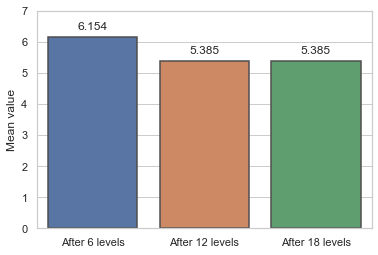

In [7]:
ax = sns.barplot(data=conationMeanTable, linewidth=1.5, edgecolor=".3")
ax.set(ylim=(0, 7))
ax.set(ylabel='Mean value')
add_value_labels(ax)

ax.figure.savefig('Figures/Continuation_Desire.png')

# Get single participant's conation explanation data

In [8]:
p1Why = pd.read_table('Data/Participant1/whyConation.txt',header=None).T
p2Why = pd.read_table('Data/Participant2/whyConation.txt',header=None).T
p3Why = pd.read_table('Data/Participant3/whyConation.txt',header=None).T
p4Why = pd.read_table('Data/Participant4/whyConation.txt',header=None).T
p5Why = pd.read_table('Data/Participant2/whyConation.txt',header=None).T
p6Why = pd.read_table('Data/Participant6/whyConation.txt',header=None).T
p7Why = pd.read_table('Data/Participant7/whyConation.txt',header=None).T
p8Why = pd.read_table('Data/Participant8/whyConation.txt',header=None).T
p9Why = pd.read_table('Data/Participant9/whyConation.txt',header=None).T
p10Why = pd.read_table('Data/Participant10/whyConation.txt',header=None).T
p11Why = pd.read_table('Data/Participant11/whyConation.txt',header=None).T
p12Why = pd.read_table('Data/Participant12/whyConation.txt',header=None).T
p13Why = pd.read_table('Data/Participant13/whyConation.txt',header=None).T

p10Why

,0,1,2,3,4,5
0,It is extremely interesting and unlike any concept I've seen in games like this before. Very profiessional design in regards to progress as well,----------------,Still incredibly intrigued - and love how new mechanics continue being introduced with good pacing between them,----------------,"The last two levels were the first ones htta really made me think, especially the last one. I like that all the elements are being combined together now, making it rather complicated",----------------
